**2022-02-22 `09.1-Advanced-Databases - Querying Databases with SQLAlchemy`**

**Now that we have a nice base understanding of SQL.  Let's combine our python skills with SQL! We are going to be back in Jupyter today, writing queries against a native Python DataBase.  We are also going to touch on Object Oriented Programming (very briefly).**
* [SQLAlchemy Features](https://www.sqlalchemy.org/features.html)
* [SQLAlchemy Documentation](http://docs.sqlalchemy.org/en/latest/dialects)
* [Object Relational Tutorial link](https://docs.sqlalchemy.org/en/13/orm/tutorial.html) - for learning more about Python classes
* [OOP Explanation (12 min read)](https://medium.com/from-the-scratch/oop-everything-you-need-to-know-about-object-oriented-programming-aee3c18e281b)
* [SQL Alchemy ORM (15 min read)](https://medium.com/dataexplorations/sqlalchemy-orm-a-more-pythonic-way-of-interacting-with-your-database-935b57fd2d4d)
* [SQL Alchemy](https://towardsdatascience.com/sql-queries-in-python-51ef85b92c1e)
* [SQL Alchemy Joins](https://www.tutorialspoint.com/sqlalchemy/sqlalchemy_orm_working_with_joins.htm)
* [Date Tutorial](https://www.w3schools.com/python/python_datetime.asp)
* [Nice tutorial - you can stop at "static files and templates" for today's class](https://dev.to/gajesh/the-complete-flask-beginner-tutorial-124i)

**Objectives**

* Connect to a SQLite database using SQLAlchemy.
* Perform basic SQL queries using `engine.execute()`.
* Reflect existing databases.
* Use the SQLAlchemy Inspector to view table names and metadata in the SQLite file.
* Plot the query results from the SQLAlchemy object relational mapper (ORM).


**Presentation**
* [09.1-Advanced-Databases - Querying Databases with SQLAlchemy](https://ucb.bootcampcontent.com/UCB-Coding-Bootcamp/ucb-virt-data-pt-10-2021-u-b/-/blob/master/03-Lesson-Plans/09-Advanced-Databases/Slideshows/Data-M_09.1-SQLAlchemy.pdf)

**Install**

```
pip install sqlalchemy

```

**Check that you have SQLite installed**
* In your terminal/Git Bash, run: `sqlite3 --version`
* If sqlite is NOT installed, run: conda install -c anaconda sqlite

# ==========================================

### 1.01 Everyone Do: Building a SQLAlchemy Connection (0:10)

In [8]:
# SQLAlchemy
from sqlalchemy import create_engine
from sqlalchemy import inspect
# Pandas
import pandas as pd

# Path to sqlite
database_path = "01-Evr_BasicSQL_Connection/Resources/Census_Data.sqlite"

In [9]:
# Create an engine that can talk to the database
engine = create_engine(f"sqlite:///{database_path}")

In [10]:
# Get the name of the table. 
inspector = inspect(engine)
inspector.get_table_names()

['Census_Data']

In [11]:
# Using the inspector to print the column names within the 'Census_Data' table and its types
columns = inspector.get_columns('Census_Data')
for column in columns:
    print(column)

{'name': 'CityState', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'city', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'state', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'Population', 'type': INTEGER(), 'nullable': True, 'default': 'NULL', 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'White Population', 'type': INTEGER(), 'nullable': True, 'default': 'NULL', 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'Black Population', 'type': INTEGER(), 'nullable': True, 'default': 'NULL', 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'Native American Population', 'type': INTEGER(), 'nullable': True, 'default': 'NULL', 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'Asian Population', 'type': INTEGER(), 'nullable': True, 'default': 'NULL', 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'Hispani

In [12]:
# Get the column names for the table
column_names = inspector.get_columns('Census_Data')
for column_name in column_names:
    print(column_name["name"])

CityState
city
state
Population
White Population
Black Population
Native American Population
Asian Population
Hispanic Population
Education None
Education High School
Education GED
Education Associates
Education Bachelors
Education Masters
Education Professional
Education Doctorate
Poverty
Employment Labor Force
Employment Unemployed
Employment Male Computer Engineering
Employment Female Computer Engineering
Median Age
Median Male Age
Median Female Age
Household Income
Income Per Capita
Median Gross Rent
Median Home Value
lat
lng


In [13]:
# Query All Records in the the Database
data = engine.execute("SELECT * FROM Census_Data")

for record in data:
    print(record)

('HOUSTON, TX', 'HOUSTON', 'TX', 3061887, 1775897, 684416, 11586, 230549, 1368287, 54180, 387082, 62520, 100014, 349920, 138882, 42491, 27737, 633609, 1593803, 122895, 67484, 22637, 33.43958333, 32.55, 34.36354167, 56206.5, 32239.52083, 956.7083333, 178233.6842, 29.77573444, -95.41454828)
('CHICAGO, IL', 'CHICAGO', 'IL', 2702091, 1318869, 843633, 7554, 161478, 785374, 32800, 370569, 50202, 100972, 385664, 178511, 54636, 26956, 588639, 1439118, 173087, 45864, 18209, 34.52678571, 33.79821429, 35.14107143, 57735.96429, 38730.83929, 1119.928571, 264739.2857, 41.86783754, -87.67343993)
('BROOKLYN, NY', 'BROOKLYN', 'NY', 2595259, 1126111, 870465, 8744, 297890, 509243, 48934, 389177, 65899, 107313, 348413, 164826, 39328, 17446, 597404, 1297832, 129667, 33644, 14845, 35.17567568, 33.36756757, 36.57837838, 51469.18919, 28309.67568, 1261.783784, 605743.2432, 40.65280511, -73.9565277)
('LOS ANGELES, CA', 'LOS ANGELES', 'CA', 2426413, 1068202, 324842, 15949, 273829, 1292382, 62684, 280325, 22924, 

In [14]:
# Query Single Record in the the Database
data = engine.execute("SELECT CityState FROM Census_Data WHERE Population >= 1000000;")
for record in data:
    print(record)

('HOUSTON, TX',)
('CHICAGO, IL',)
('BROOKLYN, NY',)
('LOS ANGELES, CA',)
('MIAMI, FL',)
('SAN ANTONIO, TX',)
('NEW YORK, NY',)
('PHILADELPHIA, PA',)
('LAS VEGAS, NV',)
('BRONX, NY',)
('PHOENIX, AZ',)
('DALLAS, TX',)
('SAN DIEGO, CA',)
('MINNEAPOLIS, MN',)
('DENVER, CO',)
('AUSTIN, TX',)
('SAN JOSE, CA',)


In [18]:
# Query Single Record in the the Database
data = engine.execute("SELECT Household Income FROM Census_Data;")
for record in data:
    print(record)

OperationalError: (sqlite3.OperationalError) no such column: Household
[SQL: SELECT Household Income FROM Census_Data;]
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [19]:
# Query Single Record in the the Database
data = engine.execute('SELECT "Household Income" FROM Census_Data;')
for record in data:
    print(record)

(56206.5,)
(57735.96429,)
(51469.18919,)
(47494.58333,)
(51232.90741,)
(54895.83051,)
(94798.62222,)
(44288.3913,)
(55166.19048,)
(39554.88,)
(49920.66667,)
(51959.39583,)
(77168.96774,)
(66141.14583,)
(57185.15789,)
(71627.34884,)
(91940.5,)
(55902.32432,)
(51566.33333,)
(51174.83784,)
(50134.2,)
(51534.51613,)
(67507.52941,)
(58080.0,)
(50795.51613,)
(59646.41667,)
(86977.30769,)
(47525.93333,)
(43695.28571,)
(44047.23333,)
(63799.14815,)
(48729.88889,)
(45420.63636,)
(65228.51724,)
(52297.14286,)
(50951.96154,)
(35129.96429,)
(47944.875,)
(40954.44,)
(52713.76923,)
(51632.16279,)
(50129.17647,)
(24956.32,)
(79608.26087,)
(47373.55,)
(56344.52381,)
(44537.0,)
(41178.14815,)
(53804.02222,)
(64080.82143,)
(56294.18182,)
(58872.26667,)
(62716.0,)
(50552.84615,)
(45750.39286,)
(49304.33333,)
(57630.72727,)
(43822.31818,)
(70786.41667,)
(66290.4,)
(58964.0,)
(59263.33333,)
(52574.7,)
(61790.0,)
(44540.53571,)
(38920.15789,)
(58639.30769,)
(64337.5,)
(49122.16667,)
(61788.92308,)
(56641.08

### Read SQLite file into Pandas DataFrame

In [20]:
# Make a connection to the SQL database
conn = engine.connect()

In [21]:
# Query All Records in the the Database
census_data_df = pd.read_sql("SELECT * FROM Census_Data", conn)
census_data_df.head()

CityState         city state  Population  White Population  \
0      HOUSTON, TX      HOUSTON    TX     3061887           1775897   
1      CHICAGO, IL      CHICAGO    IL     2702091           1318869   
2     BROOKLYN, NY     BROOKLYN    NY     2595259           1126111   
3  LOS ANGELES, CA  LOS ANGELES    CA     2426413           1068202   
4        MIAMI, FL        MIAMI    FL     1820704           1361009   

   Black Population  Native American Population  Asian Population  \
0            684416                       11586            230549   
1            843633                        7554            161478   
2            870465                        8744            297890   
3            324842                       15949            273829   
4            363514                        2250             33144   

   Hispanic Population  Education None  ...  \
0              1368287           54180  ...   
1               785374           32800  ...   
2               509243           48934  ...   
3              1292382           62684  ...   
4              1162711           27137  ...   

   Employment Female Computer Engineering  Median Age  Median Male Age  \
0                                   22637   33.439583        32.550000   
1                                   18209   34.526786        33.798214   
2                                   14845   35.175676        33.367568   
3                                   12329   35.335484        34.535484   
4                                    6969   38.740741        37.120370   

   Median Female Age  Household Income  Income Per Capita  Median Gross Rent  \
0          34.363542       56206.50000        32239.52083         956.708333   
1          35.141071       57735.96429        38730.83929        1119.928571   
2          36.578378       51469.18919        28309.67568        1261.783784   
3          36.061290       47494.58333        30073.19355        1201.766667   
4          40.262963       51232.90741        25949.35185        1260.833333   

   Median Home Value        lat         lng  
0        178233.6842  29.775734  -95.414548  
1        264739.2857  41.867838  -87.673440  
2        605743.2432  40.652805  -73.956528  
3        557115.0000  34.042209 -118.303468  
4        243279.6296  25.760268  -80.298511  

[5 rows x 31 columns]

In [22]:
# Get the CityState where the Household Income is equal to or greater than $100,000. 
census_data_df.loc[census_data_df["Hispanic Population"]>= 500000]['CityState'].values

array(['HOUSTON, TX', 'CHICAGO, IL', 'BROOKLYN, NY', 'LOS ANGELES, CA',
       'MIAMI, FL', 'SAN ANTONIO, TX', 'BRONX, NY', 'PHOENIX, AZ',
       'DALLAS, TX', 'EL PASO, TX'], dtype=object)

In [23]:
census_data_df.describe()

Population  White Population  Black Population  \
count  9.990000e+02      9.990000e+02        999.000000   
mean   1.676974e+05      1.105973e+05      27694.100100   
std    2.566043e+05      1.508968e+05      70237.496877   
min    5.665600e+04      2.380000e+03        105.000000   
25%    7.089850e+04      5.139800e+04       2932.500000   
50%    9.336900e+04      6.724300e+04       8207.000000   
75%    1.489445e+05      1.039805e+05      22969.000000   
max    3.061887e+06      1.775897e+06     870465.000000   

       Native American Population  Asian Population  Hispanic Population  \
count                  999.000000        999.000000         9.990000e+02   
mean                   991.945946      11419.363363         3.917005e+04   
std                   2297.259205      26906.391975         1.018179e+05   
min                      2.000000        136.000000         5.440000e+02   
25%                    186.500000       1669.500000         5.640500e+03   
50%                    382.000000       4086.000000         1.430100e+04   
75%                    825.000000      10900.500000         3.752850e+04   
max                  29357.000000     339947.000000         1.368287e+06   

       Education None  Education High School  Education GED  \
count      999.000000             999.000000     999.000000   
mean      1885.815816           23248.018018    3868.761762   
std       4252.930644           35227.746482    5843.970339   
min         32.000000            2013.000000     172.000000   
25%        448.500000           10090.500000    1303.500000   
50%        837.000000           13777.000000    2310.000000   
75%       1774.000000           21374.000000    3814.500000   
max      62684.000000          389177.000000   65899.000000   

       Education Associates  ...  Employment Female Computer Engineering  \
count            999.000000  ...                              999.000000   
mean            8455.614615  ...                             1220.551552   
std            11393.835888  ...                             2144.006231   
min              899.000000  ...                                0.000000   
25%             3797.500000  ...                              326.000000   
50%             5046.000000  ...                              590.000000   
75%             7976.000000  ...                             1173.000000   
max           113990.000000  ...                            22637.000000   

       Median Age  Median Male Age  Median Female Age  Household Income  \
count  999.000000       999.000000         999.000000        999.000000   
mean    36.728758        35.564994          37.849369      60570.269105   
std      4.934396         4.752334           5.121261      20206.685929   
min     21.400000        21.350000          21.500000      23548.250000   
25%     33.973333        33.000000          35.010000      45474.409090   
50%     36.600000        35.300000          37.750000      55222.000000   
75%     39.275000        38.000000          40.700000      71103.250000   
max     63.866667        63.200000          64.400000     152760.666700   

       Income Per Capita  Median Gross Rent  Median Home Value         lat  \
count         999.000000         999.000000       9.990000e+02  999.000000   
mean        29022.028476        1073.368450       2.477122e+05   36.958382   
std          9808.968724         313.829454       1.631071e+05    4.950274   
min         11822.000000         545.000000       4.948333e+04   25.458304   
25%         22393.208335         828.250000       1.436583e+05   33.713576   
50%         26818.666670        1006.000000       1.949750e+05   37.360503   
75%         33374.035715        1268.500000       3.000333e+05   40.763011   
max         83906.000000        2394.000000       1.522550e+06   48.748558   

              lng  
count  999.000000  
mean   -94.087058  
std     16.801787  
min   -123.375953  
25%   -112.028753  
50%    -87.968863  
75%    -80.832494  


# ==========================================

### 1.02 Instructor Do: Reflections (0:10)

[Object Relational Tutorial link](https://docs.sqlalchemy.org/en/13/orm/tutorial.html)

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

In [25]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///02-Ins_Reflection/Resources/dow.sqlite")

In [26]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [27]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [28]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['dow']

In [29]:
# Assign the dow class to a variable called `Dow`
Dow = Base.classes.dow

In [30]:
# Create a session
session = Session(engine)

In [31]:
# Display the row's columns and data in dictionary format
first_row = session.query(Dow).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2e2baa280c8>,
 'close_price': 16.42,
 'volume': 239655616,
 'id': 1,
 'stock': 'AA',
 'open_price': 15.82,
 'low_price': 15.78,
 'percent_change': None,
 'quarter': 1,
 'date': '2011-01-07',
 'high_price': 16.72}

In [32]:
# Use the session to query Dow table and display the first 5 trade volumes
for row in session.query(Dow.stock, Dow.volume).limit(15).all():
    print(row)

('AA', 239655616)
('AA', 242963398)
('AA', 138428495)
('AA', 151379173)
('AA', 154387761)
('AA', 114691279)
('AA', 80023895)
('AA', 132981863)
('AA', 109493077)
('AA', 114332562)
('AA', 130374108)
('AA', 95550392)
('AXP', 45102042)
('AXP', 25913713)
('AXP', 38824728)


# ==========================================

### 1.03 Students Do: Reflecting on SQL (0:15)

# Instructions

* Create engine using the `demographics.sqlite` database file

* Declare a Base using `automap_base()` and use this new Base class to reflect the database's tables

* Assign the demographics table/class to a variable called `Demographics`

* Create a session and use this session to query the `Demographics` table and display the first five locations

* **Bonus**:

  * Query and print the number of unique locations in the table.

* **Hint**:

  * For the bonus, look into counting and grouping operations in SQLAlchemy

---

In [33]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

In [34]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///03-Stu_ReflectingOnSQL/Resources/demographics.sqlite")

In [35]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [36]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [37]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['demographics']

In [38]:
# Assign the demographics class to a variable called `Demographics`
Demographics = Base.classes.demographics
Demographics

sqlalchemy.ext.automap.demographics

In [39]:
# Create a session
session = Session(engine)

In [40]:
# Use the session to query Demographics table and display the first 5 locations
for row in session.query(Demographics.location).limit(5).all():
    print(row)

('South Dakota',)
('Delaware',)
('South Dakota',)
('Louisiana',)
('West Virginia',)


In [41]:
# BONUS: Query and print the number of unique Locations
# Hints: Look into counting and grouping operations in SQLAlchemy
locations = session.query(Demographics).group_by(Demographics.location).count()
locations

5

# ==========================================

### 1.04 Instructor Do: SQLAlchemy Exploration (0:05)

In [42]:
# Import SQLAlchemy `automap` and other dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, MetaData, Table

### Using SQLAlchemy ORM to reflect and map the table

In [43]:
# Create the connection engine
engine = create_engine("sqlite:///04-Ins_Exploration/Resources/dow.sqlite")
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [44]:
# Print all of the classes (tables) mapped to the Base
Base.classes.keys()

['dow']

### Use the inspect() function to reflect the table and get the column names.

In [45]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [46]:
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('dow')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
quarter INTEGER
stock TEXT
date TEXT
open_price FLOAT
high_price FLOAT
low_price FLOAT
close_price FLOAT
volume INTEGER
percent_change FLOAT


### Use the Metadata and Table object to describe the table and columns.

In [47]:
#  Create a meta data object to hold the reflected table schema
metadata = MetaData()

In [48]:
# Create a table object and use 'autoload' and 'autoload_with' to define the columns from the table. 
table = Table('dow', metadata, autoload=True, autoload_with=engine)

In [49]:
# Get the column names using the 'keys()' method on the column object. 
table.columns.keys()

['id',
 'quarter',
 'stock',
 'date',
 'open_price',
 'high_price',
 'low_price',
 'close_price',
 'volume',
 'percent_change']

In [50]:
table.columns.stock

Column('stock', TEXT(), table=<dow>)

### Use SQL to query the table. 

In [51]:
# Use SQL to query 'all' the records in the the Database 
data = engine.execute("SELECT * FROM dow")

for record in data:
    print(record)

(1, 1, 'AA', '2011-01-07', 15.82, 16.72, 15.78, 16.42, 239655616, None)
(2, 1, 'AA', '2011-01-14', 16.71, 16.71, 15.64, 15.97, 242963398, None)
(3, 1, 'AA', '2011-01-21', 16.19, 16.38, 15.6, 15.79, 138428495, None)
(4, 1, 'AA', '2011-01-28', 15.87, 16.63, 15.82, 16.13, 151379173, None)
(5, 1, 'AA', '2011-02-04', 16.18, 17.39, 16.18, 17.14, 154387761, None)
(6, 1, 'AA', '2011-02-11', 17.33, 17.48, 16.97, 17.37, 114691279, None)
(7, 1, 'AA', '2011-02-18', 17.39, 17.68, 17.28, 17.28, 80023895, None)
(8, 1, 'AA', '2011-02-25', 16.98, 17.15, 15.96, 16.68, 132981863, None)
(9, 1, 'AA', '2011-03-04', 16.81, 16.94, 16.13, 16.58, 109493077, None)
(10, 1, 'AA', '2011-03-11', 16.58, 16.75, 15.42, 16.03, 114332562, None)
(11, 1, 'AA', '2011-03-18', 15.95, 16.33, 15.43, 16.11, 130374108, None)
(12, 1, 'AA', '2011-03-25', 16.38, 17.24, 16.26, 17.09, 95550392, None)
(13, 1, 'AXP', '2011-01-07', 43.3, 45.6, 43.11, 44.36, 45102042, None)
(14, 1, 'AXP', '2011-01-14', 44.2, 46.25, 44.01, 46.25, 25913713,

In [52]:
# Use SQL to get all the unique stocks.
engine.execute('SELECT DISTINCT Stock FROM dow').fetchall()

[('AA',),
 ('AXP',),
 ('BA',),
 ('BAC',),
 ('CAT',),
 ('CSCO',),
 ('CVX',),
 ('DD',),
 ('DIS',),
 ('GE',),
 ('HD',),
 ('HPQ',),
 ('IBM',),
 ('INTC',),
 ('JNJ',),
 ('JPM',),
 ('KRFT',),
 ('KO',),
 ('MCD',),
 ('MMM',),
 ('MRK',),
 ('MSFT',),
 ('PFE',),
 ('PG',),
 ('T',),
 ('TRV',),
 ('UTX',),
 ('VZ',),
 ('WMT',),
 ('XOM',)]

### Use Python to query the table. 

In [53]:
# Assign the dow class to a variable called `Dow`
Dow = Base.classes.dow
Dow

sqlalchemy.ext.automap.dow

In [54]:
# Create a session
session = Session(engine)

In [55]:
# Print all the stocks. 
for stocks in session.query(Dow.stock).all():
    print(stocks)

('AA',)
('AA',)
('AA',)
('AA',)
('AA',)
('AA',)
('AA',)
('AA',)
('AA',)
('AA',)
('AA',)
('AA',)
('AXP',)
('AXP',)
('AXP',)
('AXP',)
('AXP',)
('AXP',)
('AXP',)
('AXP',)
('AXP',)
('AXP',)
('AXP',)
('AXP',)
('BA',)
('BA',)
('BA',)
('BA',)
('BA',)
('BA',)
('BA',)
('BA',)
('BA',)
('BA',)
('BA',)
('BA',)
('BAC',)
('BAC',)
('BAC',)
('BAC',)
('BAC',)
('BAC',)
('BAC',)
('BAC',)
('BAC',)
('BAC',)
('BAC',)
('BAC',)
('CAT',)
('CAT',)
('CAT',)
('CAT',)
('CAT',)
('CAT',)
('CAT',)
('CAT',)
('CAT',)
('CAT',)
('CAT',)
('CAT',)
('CSCO',)
('CSCO',)
('CSCO',)
('CSCO',)
('CSCO',)
('CSCO',)
('CSCO',)
('CSCO',)
('CSCO',)
('CSCO',)
('CSCO',)
('CSCO',)
('CVX',)
('CVX',)
('CVX',)
('CVX',)
('CVX',)
('CVX',)
('CVX',)
('CVX',)
('CVX',)
('CVX',)
('CVX',)
('CVX',)
('DD',)
('DD',)
('DD',)
('DD',)
('DD',)
('DD',)
('DD',)
('DD',)
('DD',)
('DD',)
('DD',)
('DD',)
('DIS',)
('DIS',)
('DIS',)
('DIS',)
('DIS',)
('DIS',)
('DIS',)
('DIS',)
('DIS',)
('DIS',)
('DIS',)
('DIS',)
('GE',)
('GE',)
('GE',)
('GE',)
('GE',)
('GE',)
('GE

In [56]:
# Print all the unique stocks. 
for stocks in session.query(Dow.stock).distinct():
    print(stocks)

('AA',)
('AXP',)
('BA',)
('BAC',)
('CAT',)
('CSCO',)
('CVX',)
('DD',)
('DIS',)
('GE',)
('HD',)
('HPQ',)
('IBM',)
('INTC',)
('JNJ',)
('JPM',)
('KRFT',)
('KO',)
('MCD',)
('MMM',)
('MRK',)
('MSFT',)
('PFE',)
('PG',)
('T',)
('TRV',)
('UTX',)
('VZ',)
('WMT',)
('XOM',)


# ==========================================

### 1.05 Students Do: Salary Exploration (0:15)

# Instructions:

* Using the attached SQLite file, do the following:

  * Use SQLAlchemy ORM to reflect and map the table. 
  * Use the `inspect()` function to get the column names and types.
  * Use the `Metadata` and `Table` object to get the column names.
  * Use SQL commands to get all the records in the the table.
  * Use SQL commands to get all the job titles where the Total Pay is greater than or equal to $250,000.
  * Use Python to get all the job titles where the Total Pay is greater than or equal to $250,000.

---

In [74]:
# Import SQLAlchemy `automap` and other dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, MetaData, Table

### Using SQLAlchemy ORM to reflect and map the table¶

In [75]:
# Create the connection engine
engine = create_engine("sqlite:///05-Stu_SalaryExplore/Resources/database.sqlite")
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [76]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['Salaries']

### Use the inspect() function to reflect the table and get the column names.

In [77]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [78]:
# Using the inspector to print the column names within the table and its types
columns = inspector.get_columns('Salaries')
for column in columns:
    print(column["name"], column["type"])

Id INTEGER
EmployeeName TEXT
JobTitle TEXT
BasePay NUMERIC
OvertimePay NUMERIC
OtherPay NUMERIC
Benefits NUMERIC
TotalPay NUMERIC
TotalPayBenefits NUMERIC
Year INTEGER
Notes TEXT
Agency TEXT
Status TEXT


### Use the Metadata and Table object to describe the table and columns.

In [79]:
#  Create a meta data object to hold the reflected table schema
metadata = MetaData()

In [80]:
# Create a table object and use 'autoload' and 'autoload_with' to define the columns from the table. 
table = Table('salaries', metadata, autoload=True, autoload_with=engine)

In [81]:
# Get the column names using the 'keys()' method on the column object. 
table.columns.keys()

['Id',
 'EmployeeName',
 'JobTitle',
 'BasePay',
 'OvertimePay',
 'OtherPay',
 'Benefits',
 'TotalPay',
 'TotalPayBenefits',
 'Year',
 'Notes',
 'Agency',
 'Status']

In [82]:
### Use SQL to query the table. 

In [83]:
# Get 'all' the records in the the table
data = engine.execute("SELECT * FROM Salaries")
counter = 0
for record in data:
    print(record)
    if counter>10:
        break
    counter +=1

(1, 'NATHANIEL FORD', 'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY', 167411.18, 0, 400184.25, '', 567595.43, 567595.43, 2011, '', 'San Francisco', '')
(2, 'GARY JIMENEZ', 'CAPTAIN III (POLICE DEPARTMENT)', 155966.02, 245131.88, 137811.38, '', 538909.28, 538909.28, 2011, '', 'San Francisco', '')
(3, 'ALBERT PARDINI', 'CAPTAIN III (POLICE DEPARTMENT)', 212739.13, 106088.18, 16452.6, '', 335279.91, 335279.91, 2011, '', 'San Francisco', '')
(4, 'CHRISTOPHER CHONG', 'WIRE ROPE CABLE MAINTENANCE MECHANIC', 77916, 56120.71, 198306.9, '', 332343.61, 332343.61, 2011, '', 'San Francisco', '')
(5, 'PATRICK GARDNER', 'DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)', 134401.6, 9737, 182234.59, '', 326373.19, 326373.19, 2011, '', 'San Francisco', '')
(6, 'DAVID SULLIVAN', 'ASSISTANT DEPUTY CHIEF II', 118602, 8601, 189082.74, '', 316285.74, 316285.74, 2011, '', 'San Francisco', '')
(7, 'ALSON LEE', 'BATTALION CHIEF, (FIRE DEPARTMENT)', 92492.01, 89062.9, 134426.14, '', 315981.05, 315981.05, 2011, ''

In [84]:
# Get all the job titles where the Total Pay is greater than or equal to $250,000.
job_titles = engine.execute("SELECT DISTINCT JobTitle FROM Salaries WHERE TotalPay >= 250000")

for job_title in job_titles:
    print(job_title)

('GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',)
('CAPTAIN III (POLICE DEPARTMENT)',)
('WIRE ROPE CABLE MAINTENANCE MECHANIC',)
('DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)',)
('ASSISTANT DEPUTY CHIEF II',)
('BATTALION CHIEF, (FIRE DEPARTMENT)',)
('DEPUTY DIRECTOR OF INVESTMENTS',)
('CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)',)
('ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)',)
('EXECUTIVE CONTRACT EMPLOYEE',)
('DEPARTMENT HEAD V',)
('COMMANDER III, (POLICE DEPARTMENT)',)
('CAPTAIN, EMERGENCYCY MEDICAL SERVICES',)
('ASSISTANT MEDICAL EXAMINER',)
('CAPTAIN, FIRE SUPPRESSION',)
('CHIEF OF POLICE',)
('DEPUTY CHIEF III (POLICE DEPARTMENT)',)
('INSPECTOR III, (POLICE DEPARTMENT)',)
('ELECTRONIC MAINTENANCE TECHNICIAN',)
('ADMINISTRATOR, SFGH MEDICAL CENTER',)
('LIEUTENANT III (POLICE DEPARTMENT)',)
('FIREFIGHTER',)
('NURSING SUPERVISOR PSYCHIATRIC',)
('Lieutenant, Fire Suppression',)
('Chief of Police',)
('Electronic Maintenance Tech',)
('Chief, Fire Department',)
('EMT/Paramedic/Firef

### Use Python to query the table. 

In [85]:
# Assign the class to a variable
Salaries = Base.classes.Salaries
Salaries

sqlalchemy.ext.automap.Salaries

In [86]:
# Create a session
session = Session(engine)

In [87]:
# Get all the job titles where the Total Pay is greater than or equal to $250,000.
jobs = session.query(Salaries.JobTitle).filter(Salaries.TotalPay >= 250000)
for job in jobs:
    print(job)

('GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',)
('CAPTAIN III (POLICE DEPARTMENT)',)
('CAPTAIN III (POLICE DEPARTMENT)',)
('WIRE ROPE CABLE MAINTENANCE MECHANIC',)
('DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)',)
('ASSISTANT DEPUTY CHIEF II',)
('BATTALION CHIEF, (FIRE DEPARTMENT)',)
('DEPUTY DIRECTOR OF INVESTMENTS',)
('BATTALION CHIEF, (FIRE DEPARTMENT)',)
('CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)',)
('ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)',)
('CAPTAIN III (POLICE DEPARTMENT)',)
('EXECUTIVE CONTRACT EMPLOYEE',)
('DEPARTMENT HEAD V',)
('BATTALION CHIEF, (FIRE DEPARTMENT)',)
('COMMANDER III, (POLICE DEPARTMENT)',)
('DEPARTMENT HEAD V',)
('CAPTAIN, EMERGENCYCY MEDICAL SERVICES',)
('BATTALION CHIEF, (FIRE DEPARTMENT)',)
('ASSISTANT MEDICAL EXAMINER',)
('ASSISTANT MEDICAL EXAMINER',)
('ASSISTANT MEDICAL EXAMINER',)
('CAPTAIN, FIRE SUPPRESSION',)
('BATTALION CHIEF, (FIRE DEPARTMENT)',)
('CAPTAIN, FIRE SUPPRESSION',)
('CHIEF OF POLICE',)
('CAPTAIN, FIRE SUPPRESSION',)
('BATTAL

In [88]:
# Get all the job titles in the Police department where the Total Pay is greater than or equal to $250,000.
jobs = session.query(Salaries.JobTitle).filter(Salaries.JobTitle.like('%POLICE%')).filter(Salaries.TotalPay >= 250000)
for job in jobs:
    print(job)

('CAPTAIN III (POLICE DEPARTMENT)',)
('CAPTAIN III (POLICE DEPARTMENT)',)
('CAPTAIN III (POLICE DEPARTMENT)',)
('COMMANDER III, (POLICE DEPARTMENT)',)
('CHIEF OF POLICE',)
('DEPUTY CHIEF III (POLICE DEPARTMENT)',)
('DEPUTY CHIEF III (POLICE DEPARTMENT)',)
('INSPECTOR III, (POLICE DEPARTMENT)',)
('INSPECTOR III, (POLICE DEPARTMENT)',)
('LIEUTENANT III (POLICE DEPARTMENT)',)
('Chief of Police',)
('Chief of Police',)
('Police Officer 2',)
('Chief of Police',)
('Police Officer 3',)
('Police Officer 2',)


# ==========================================

### 1.06 Instructor Do: Dates (0:05)

# SQLAlchemy, Sqlite, and Dates

## Setup

In [89]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [90]:
engine = create_engine("sqlite:///06-Ins_Dates/Resources/dow.sqlite", echo=False)

## Explore Database

In [91]:
inspector = inspect(engine)
inspector.get_table_names()

['dow']

In [92]:
# Get a list of column names and types
columns = inspector.get_columns('dow')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
quarter INTEGER
stock TEXT
date TEXT
open_price FLOAT
high_price FLOAT
low_price FLOAT
close_price FLOAT
volume INTEGER
percent_change FLOAT


In [93]:
engine.execute('SELECT * FROM dow LIMIT 5').fetchall()

[(1, 1, 'AA', '2011-01-07', 15.82, 16.72, 15.78, 16.42, 239655616, None),
 (2, 1, 'AA', '2011-01-14', 16.71, 16.71, 15.64, 15.97, 242963398, None),
 (3, 1, 'AA', '2011-01-21', 16.19, 16.38, 15.6, 15.79, 138428495, None),
 (4, 1, 'AA', '2011-01-28', 15.87, 16.63, 15.82, 16.13, 151379173, None),
 (5, 1, 'AA', '2011-02-04', 16.18, 17.39, 16.18, 17.14, 154387761, None)]

## Reflect and query dates

In [94]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Dow = Base.classes.dow

In [95]:
session = Session(engine)

* How many dates do we have?

In [96]:
# Total dates
session.query(func.count(Dow.date)).all()

[(750,)]

* What is the earliest date?

In [97]:
# Earliest Date
session.query(Dow.date).order_by(Dow.date).first()

('2011-01-07',)

* What is the latest date?

In [98]:
# Latest Date
session.query(Dow.date).order_by(Dow.date.desc()).first()

('2011-06-24',)

* Find all of the dates great than `2011-03-01`

In [99]:
session.query(Dow.date).\
    filter(Dow.date > '2011-03-01').\
    order_by(Dow.date).all()

[('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-04',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03-11',),
 ('2011-03

### Important Note! Sqlite does not support a date column type, but SQLAlchemy will allow you to work with dates in the iso format. [sqlite dates](http://docs.sqlalchemy.org/en/latest/dialects/sqlite.html)

# Quick Review of DateTime

In [100]:
import datetime as dt

In [101]:
# Print today's date 
print(dt.date.today())
# Print a specific date 
print(dt.date(2017,10 ,8))

2022-02-22
2017-10-08


In [102]:
# Print a datetime object 
print(dt.datetime.utcnow())
print(dt.datetime(2017,10 ,8))

2022-02-22 06:24:39.083350
2017-10-08 00:00:00


* Calculate a time delta

In [103]:
# The date 9 weeks ago from today. 
week_ago = dt.date.today() - dt.timedelta(days=63)
week_ago

datetime.date(2021, 12, 21)

In [104]:
# The number of days between two datetime objects – When the next solar eclipse will be and today.
a = dt.datetime(2023, 10, 14) 
b = dt.datetime.utcnow()
  
# returns a timedelta object 
c = a-b  
print(c)

598 days, 17:35:19.460653


* Query for the Dow closing price 1 week before `2011-04-08` using the datetime library

In [105]:
# Query for the Dow closing price for `CSCO` 1 week before `2011-04-08` using the datetime library
query_date = dt.date(2011, 4, 8) - dt.timedelta(days=7)
print("Query Date: ", query_date)

Query Date:  2011-04-01


In [106]:
session.query(Dow.date, Dow.close_price).\
    filter(Dow.stock == 'CSCO').\
    filter(Dow.date == query_date).all()

[('2011-04-01', 17.04)]

In [107]:
# Parse out just the day from the datetime object
dt.date.today().strftime("%d")

'22'

* Putting it all together

In [108]:
# Query for all stocks, their opening and closing price that match
# following date string in the format `%d`
date_str = "14"
session.query(Dow.date, Dow.stock, Dow.open_price, Dow.close_price).\
    filter(func.strftime("%d", Dow.date) == date_str).all()

[('2011-01-14', 'AA', 16.71, 15.97),
 ('2011-01-14', 'AXP', 44.2, 46.25),
 ('2011-01-14', 'BA', 69.42, 70.07),
 ('2011-01-14', 'BAC', 14.17, 15.25),
 ('2011-01-14', 'CAT', 93.21, 94.01),
 ('2011-01-14', 'CSCO', 20.94, 21.21),
 ('2011-01-14', 'CVX', 90.95, 92.83),
 ('2011-01-14', 'DD', 48.3, 49.8),
 ('2011-01-14', 'DIS', 39.01, 39.29),
 ('2011-01-14', 'GE', 18.61, 18.82),
 ('2011-01-14', 'HD', 34.16, 35.89),
 ('2011-01-14', 'HPQ', 44.86, 46.25),
 ('2011-01-14', 'IBM', 147.0, 150.0),
 ('2011-01-14', 'INTC', 20.71, 21.08),
 ('2011-01-14', 'JNJ', 62.29, 62.55),
 ('2011-01-14', 'JPM', 43.27, 44.91),
 ('2011-01-14', 'KRFT', 30.91, 31.34),
 ('2011-01-14', 'KO', 62.7, 63.13),
 ('2011-01-14', 'MCD', 74.25, 74.06),
 ('2011-01-14', 'MMM', 85.7, 88.1),
 ('2011-01-14', 'MRK', 37.26, 34.23),
 ('2011-01-14', 'MSFT', 28.2, 28.3),
 ('2011-01-14', 'PFE', 18.22, 18.34),
 ('2011-01-14', 'PG', 64.4, 65.53),
 ('2011-01-14', 'T', 28.54, 28.43),
 ('2011-01-14', 'TRV', 53.12, 54.63),
 ('2011-01-14', 'UTX', 78.

## Your Turn!
DataSet Citation: 

Brown, M. S., Pelosi, M. & Dirska, H. (2013). Dynamic-radius Species-conserving Genetic Algorithm for 
the Financial Forecasting of Dow Jones Index Stocks. Machine Learning and Data Mining in Pattern 
Recognition, 7988, 27-41.


# ==========================================

### 1.07 Everyone Do: Dates (0:20)

# Instructions

* Use the `dow.sqlite` dataset provided to query for the stock and average of the open, high, low, and closing prices for all stock in the month of May sorted by stock name.

* Plot the results as a Pandas or Matplotlib Bar Chart. 

### Bonus

Calculate the high-low peak-to-peak (PTP) values for `IBM` stock after `2011-05-31`.

* Note: high-low PTP is calculated using `high_price` - `low_price`
* Use a DateTime.date object in the query filter
* Use a list comprehension or NumPy's ravel method to unpack the query's list of tuples into a list of PTP values.
* Use matplotlib to plot the PTP values as a boxplot

---

In [109]:
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [110]:
import pandas as pd

In [111]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [112]:
engine = create_engine("sqlite:///07-Evr_Dates/Resources/dow.sqlite", echo=False)

In [113]:
engine.execute('SELECT * FROM dow LIMIT 5').fetchall()

[(1, 1, 'AA', '2011-01-07', 15.82, 16.72, 15.78, 16.42, 239655616, None),
 (2, 1, 'AA', '2011-01-14', 16.71, 16.71, 15.64, 15.97, 242963398, None),
 (3, 1, 'AA', '2011-01-21', 16.19, 16.38, 15.6, 15.79, 138428495, None),
 (4, 1, 'AA', '2011-01-28', 15.87, 16.63, 15.82, 16.13, 151379173, None),
 (5, 1, 'AA', '2011-02-04', 16.18, 17.39, 16.18, 17.14, 154387761, None)]

In [114]:
inspector = inspect(engine)
columns = inspector.get_columns('dow')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
quarter INTEGER
stock TEXT
date TEXT
open_price FLOAT
high_price FLOAT
low_price FLOAT
close_price FLOAT
volume INTEGER
percent_change FLOAT


## Reflect and query dates

In [115]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Dow = Base.classes.dow

In [116]:
session = Session(engine)

## Analysis
* Analyze the Average prices (open, high, low, close) for all stocks in the Month of May

In [117]:
# Query for the stock and average prices (open, high, low, close) 
# for all stock in the month of May
# Sort the result by stock name
sel = [Dow.stock, 
       func.avg(Dow.open_price), 
       func.avg(Dow.high_price), 
       func.avg(Dow.low_price), 
       func.avg(Dow.close_price)]
may_averages = session.query(*sel).\
    filter(func.strftime("%m", Dow.date) == "05").\
    group_by(Dow.stock).\
    order_by(Dow.stock).all()
may_averages

[('AA', 16.8475, 17.3375, 16.4175, 16.747500000000002),
 ('AXP', 49.89750000000001, 51.07, 49.315, 50.5025),
 ('BA', 78.7175, 79.2175, 76.8825, 78.2125),
 ('BAC', 12.0, 12.235, 11.7325, 11.8775),
 ('CAT', 108.5525, 110.5975, 104.045, 106.4),
 ('CSCO', 17.067500000000003, 17.255000000000003, 16.5925, 16.8575),
 ('CVX', 103.9725, 105.72749999999999, 100.4575, 102.76249999999999),
 ('DD', 53.9625, 54.9225, 52.14, 53.21),
 ('DIS', 42.3, 42.8175, 41.11749999999999, 41.900000000000006),
 ('GE', 19.96, 20.175, 19.4875, 19.740000000000002),
 ('HD', 36.765, 37.51, 36.504999999999995, 36.7625),
 ('HPQ', 39.315, 40.14, 37.8425, 38.54),
 ('IBM', 169.7025, 171.58, 166.9375, 169.11749999999998),
 ('INTC', 23.0975, 23.67, 22.652500000000003, 23.0225),
 ('JNJ', 65.6575, 66.8475, 65.0575, 66.08749999999999),
 ('JPM', 44.015, 44.709999999999994, 43.019999999999996, 43.527499999999996),
 ('KO', 67.5775, 68.32499999999999, 66.75750000000001, 67.4725),
 ('KRFT', 34.305, 35.0225, 33.945, 34.7375),
 ('MCD', 

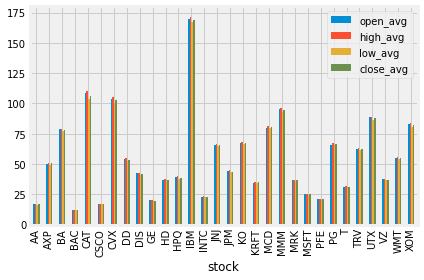

In [118]:
# Plot the Results in a Matplotlib bar chart
df = pd.DataFrame(may_averages, columns=['stock', 'open_avg', 'high_avg', 'low_avg', 'close_avg'])
df.set_index('stock', inplace=True)
df.plot.bar()
plt.tight_layout()
plt.show()


### Bonus
Calculate the high-low peak-to-peak (PTP) values for `IBM` stock after `2011-05-31`. 
* Note: high-low PTP is calculated using `high_price` - `low_price`
* Use a DateTime.date object in the query filter
* Use a list comprehension or numpy's ravel method to unpack the query's list of tuples into a list of PTP values.
* Use matplotlib to plot the PTP values as a boxplot

In [119]:
# Design a query to calculate the PTP for stock `IBM` after May, 2011
import datetime as dt
import numpy as np

date = dt.datetime(2011, 5, 31)

results = session.query(Dow.high_price - Dow.low_price).\
    filter(Dow.date > date).filter(Dow.stock == 'IBM').all()
    
ptps = list(np.ravel(results))

# List Comprehension Solution
# ptps = [result[0] for result in results]

ptps

[5.759999999999991, 3.0900000000000034, 3.579999999999984, 3.219999999999999]

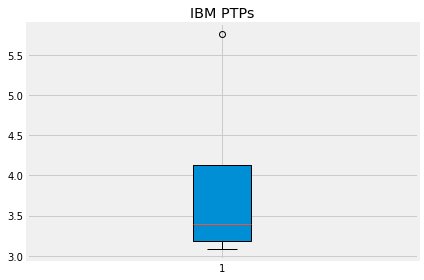

In [120]:
# Load the query into a dataframe, set the index to the date, and plot the ptps

fig, ax = plt.subplots()

x = range(len(ptps))
ax.boxplot(ptps, patch_artist=True)
ax.set_title('IBM PTPs')
fig.tight_layout()
plt.show()


# ==========================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "09.1-Advanced-Databases - Querying Databases with SQLAlchemy"
objectives = [
    "Connect to a SQLite database using SQLAlchemy",
    "Perform basic SQL queries using engine.execute()",
    "Reflect existing databases",
    "Use the SQLAlchemy Inspector to view table names and metadata in the SQLite file",
    "Plot the query results from the SQLAlchemy object relational mapper (ORM)"
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))